# Homework 2

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import torch.nn as nn
import torch.optim as optim

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.




---


**Solution:**


*   (a)



In [ ]:
fun_a = lambda x: -x**4 + 4*x**2 - 2*x + 1

x = torch.tensor(0.0, requires_grad=True)
alpha = 0.01
iter = 100
values = []
iterations = range(1, iter+1)

for i in range(iter):
    y = fun_a(x)
    y.backward()
    with torch.no_grad():
        x += alpha * x.grad
    x.grad.zero_()
    values.append(y.item())

print("Value of x which maximizes f:", round(x.item(),3))
print("Maximum value of f:", round(y.item(),3))

Value of x which maximizes f: -1.526
Maximum value of f: 7.944


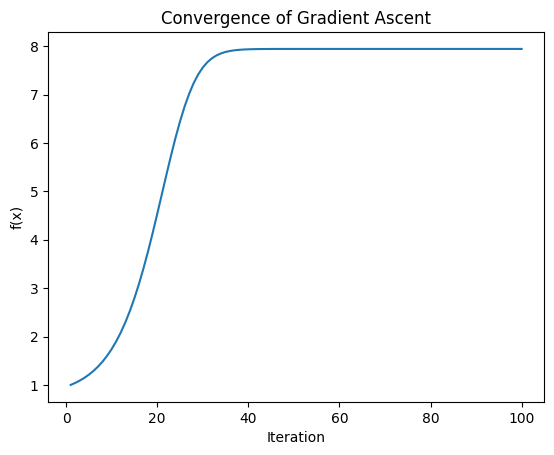

In [ ]:
# @title Plot
plt.plot(iterations, values)
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.title('Convergence of Gradient Ascent')
plt.show()



*   (b)


In [ ]:
fun_b = lambda x,y,z: -x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z

x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(1.0, requires_grad=True)
alpha = 0.01
iter = 100
values = []
iterations = range(1, iter+1)

for i in range(iter):
    val = fun_b(x,y,z)
    val.backward()
    with torch.no_grad():
        x += alpha * x.grad
        y += alpha * y.grad
        z += alpha * z.grad
    x.grad.zero_()
    y.grad.zero_()
    z.grad.zero_()
    values.append((x.item(),y.item(),z.item()))
path = torch.tensor(values)
print("Values that maximize f:")
print("x:", round(x.item(),3), "y:", round(y.item(),3), "z:", round(z.item(),3))
print("Maximum value of f:", round(val.item(),3))

Values that maximize f:
x: 0.6 y: 0.32 z: 1.2
Maximum value of f: 1.689


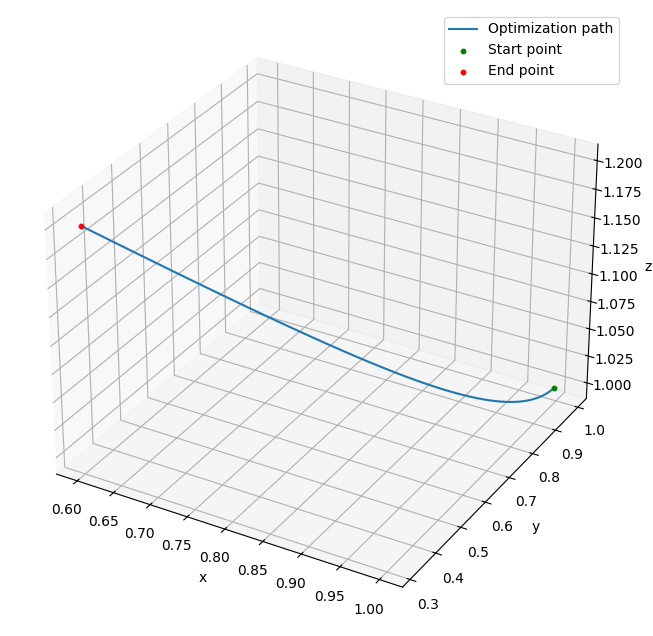

In [ ]:
# @title Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(path[:, 0], path[:, 1], path[:, 2], label="Optimization path")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(path[0, 0], path[0, 1], path[0, 2], color='green', s=10, label="Start point")
ax.scatter(path[-1, 0], path[-1, 1], path[-1, 2], color='red', s=10, label="End point")
plt.legend()
plt.show()

## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


In [ ]:
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon


**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).




---


**Solution**

Result: a = 3.00, b = 4.01


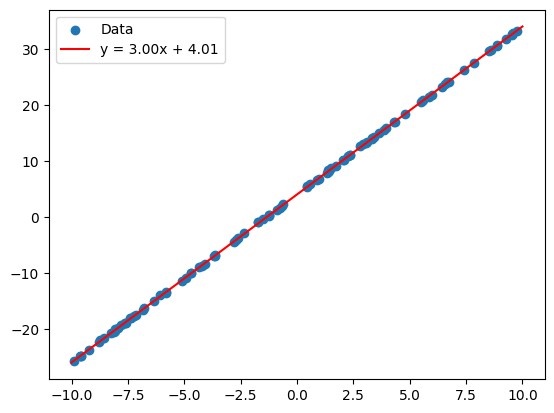

In [ ]:
def train_linear_regression(X, y, num_epochs=300, learning_rate=0.01):
    X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
    y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    model = nn.Linear(1, 1)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loss_history = []
    for epoch in range(num_epochs):
        y_pred = model(X_tensor)
        loss = criterion(y_pred, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
    a = model.weight.item()
    b = model.bias.item()
    return a, b, model, loss_history

a, b, model,_ = train_linear_regression(X, y)
print(f"Result: a = {a:.2f}, b = {b:.2f}")
X_lin = torch.linspace(-10, 10, 100).unsqueeze(1)
y_pred_lin = model(X_lin).detach()
plt.scatter(X, y, label='Data')
plt.plot(X_lin, y_pred_lin, color='red', label=f"y = {model.weight.item():.2f}x + {model.bias.item():.2f}")
plt.legend()
plt.show()

## 3. Learning Rate Analysis


**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.




---

**Solution**

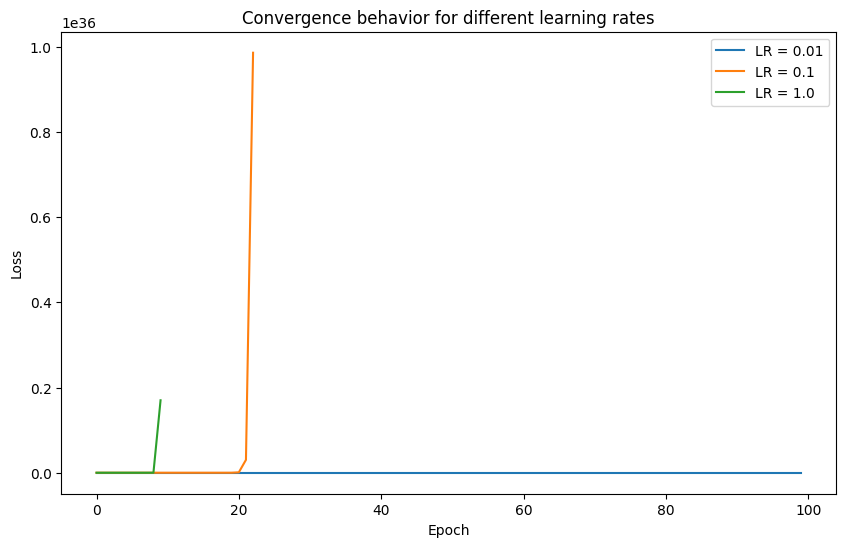

In [ ]:
learning_rates = [0.01, 0.1, 1.0]
histories = {}
for lr in learning_rates:
    _, _, model, loss_history = train_linear_regression(X, y, num_epochs=100, learning_rate=lr)
    histories[lr] = loss_history

plt.figure(figsize=(10, 6))
for lr, loss_history in histories.items():
    plt.plot(range(len(loss_history)), loss_history, label=f'LR = {lr}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Convergence behavior for different learning rates')
plt.legend()
plt.show()

If the learning rate is set too high, it can lead to instability, causing the loss values to grow uncontrollably, as seen with $LR = 0.1$ and $LR = 1$, reaching extreme magnitudes like 1e36.



## 4. Custom Gradient Descent in PyTorch


**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.




---

**Solution**

Result: a = 3.00, b = 4.01


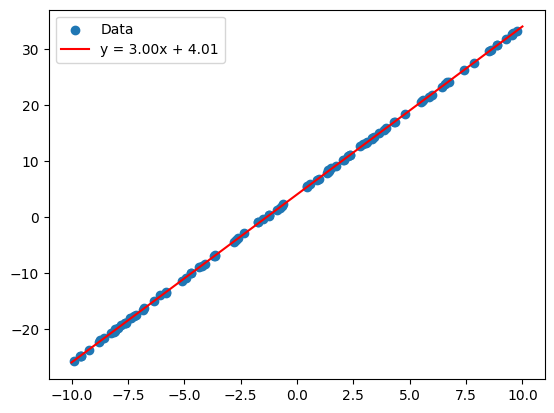

In [ ]:
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

a = torch.randn(1, requires_grad=True, dtype=torch.float32)
b = torch.randn(1, requires_grad=True, dtype=torch.float32)

learning_rate = 0.01
num_epochs = 300

loss_history = []
for epoch in range(num_epochs):
    y_pred = a * X_tensor + b
    loss = torch.mean((y_tensor - y_pred) ** 2)
    loss.backward()
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
    a.grad.zero_()
    b.grad.zero_()
    loss_history.append(loss.item())

print(f"Result: a = {a.item():.2f}, b = {b.item():.2f}")
X1 = torch.linspace(-10, 10, 100).unsqueeze(1)
y_pred_lin = a * X1 + b

plt.scatter(X, y, label='Data')
plt.plot(X1, y_pred_lin.detach(), color='red', label=f'y = {a.item():.2f}x + {b.item():.2f}')
plt.legend()
plt.show()

Training results are the same as those obtained using PyTorch's SGD optimizer.

## 5. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


In [ ]:

np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))



**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.




---

**Solution**

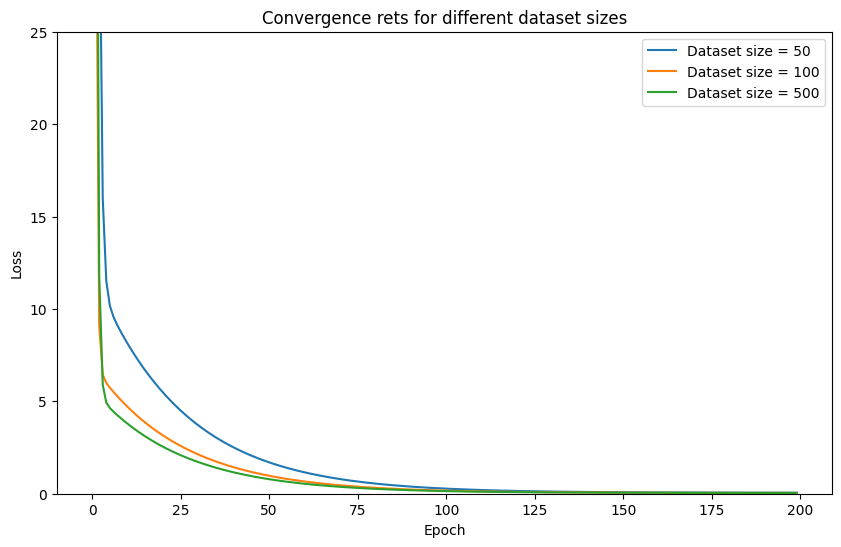

In [ ]:
learning_rate = 0.01
num_epochs = 200
histories = {}

for size, (X, y) in zip(sizes, datasets):
    _, _, model, loss_history = train_linear_regression(X, y, num_epochs=num_epochs, learning_rate=learning_rate)
    histories[size] = loss_history

plt.figure(figsize=(10, 6))

for size, loss_history in histories.items():
    plt.plot(range(len(loss_history)), loss_history, label=f'Dataset size = {size}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 25)
plt.title('Convergence rets for different dataset sizes')
plt.legend()
plt.show()

Larger datasets lead to faster convergence of the loss during training.